In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from hyperopt import fmin, tpe, hp, Trials

In [28]:
ds = pd.read_excel(r'data.xlsx')
df = pd.DataFrame({'date': ds['Дата'][-200:],
                   'sales': ds['Ростелеком'][-200:]})

df.head(7)

,date,sales
1046,23.10.2008,193.44
1047,22.10.2008,193.03
1048,21.10.2008,197.67
1049,20.10.2008,183.92
1050,17.10.2008,182.04
1051,16.10.2008,185.42
1052,15.10.2008,196.72


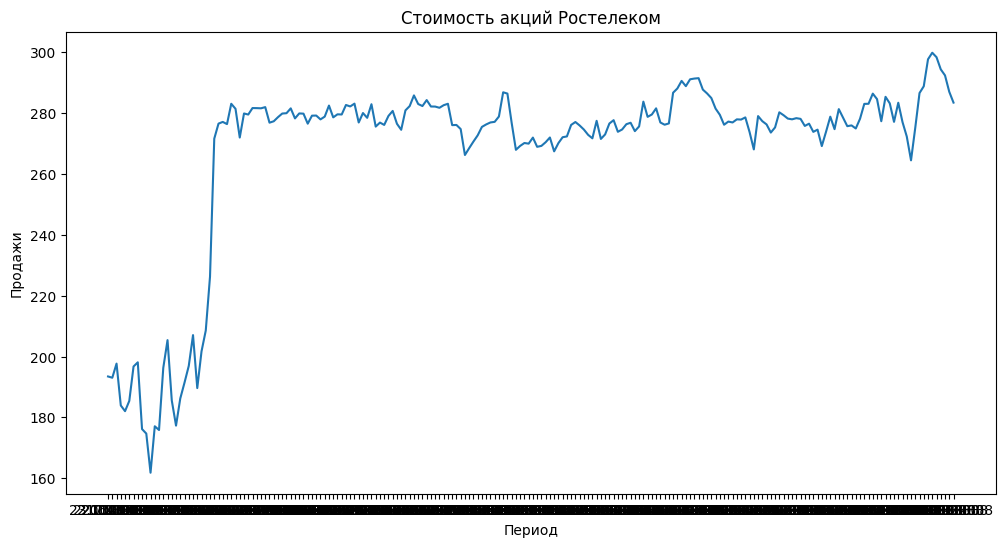

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'],df['sales'])
plt.title('Стоимость акций Ростелеком')
plt.xlabel('Период')
plt.ylabel('Продажи')
plt.show()

In [30]:
coefficients = np.polyfit(df['sales'].index, df['sales'], deg=1)
a, b = coefficients

calculated_trend = a * df['sales'].index + b

df['detrended'] = df['sales'] - calculated_trend

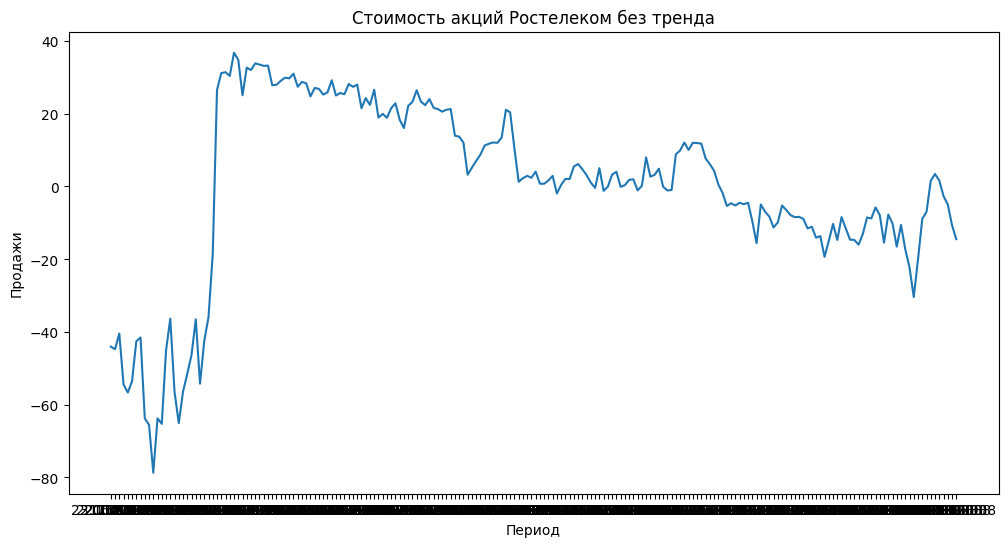

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['detrended'])
plt.title('Стоимость акций Ростелеком без тренда')
plt.xlabel('Период')
plt.ylabel('Продажи')
plt.show()

In [32]:
model = ARIMA(df['sales'], order=(1, 0, 0))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  200
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -652.801
Date:                Wed, 11 Dec 2024   AIC                           1311.602
Time:                        15:23:05   BIC                           1321.497
Sample:                             0   HQIC                          1315.606
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        255.8611     25.560     10.010      0.000     205.764     305.958
ar.L1          0.9855      0.012     83.300      0.000       0.962       1.009
sigma2        39.3463      1.436     27.395      0.0

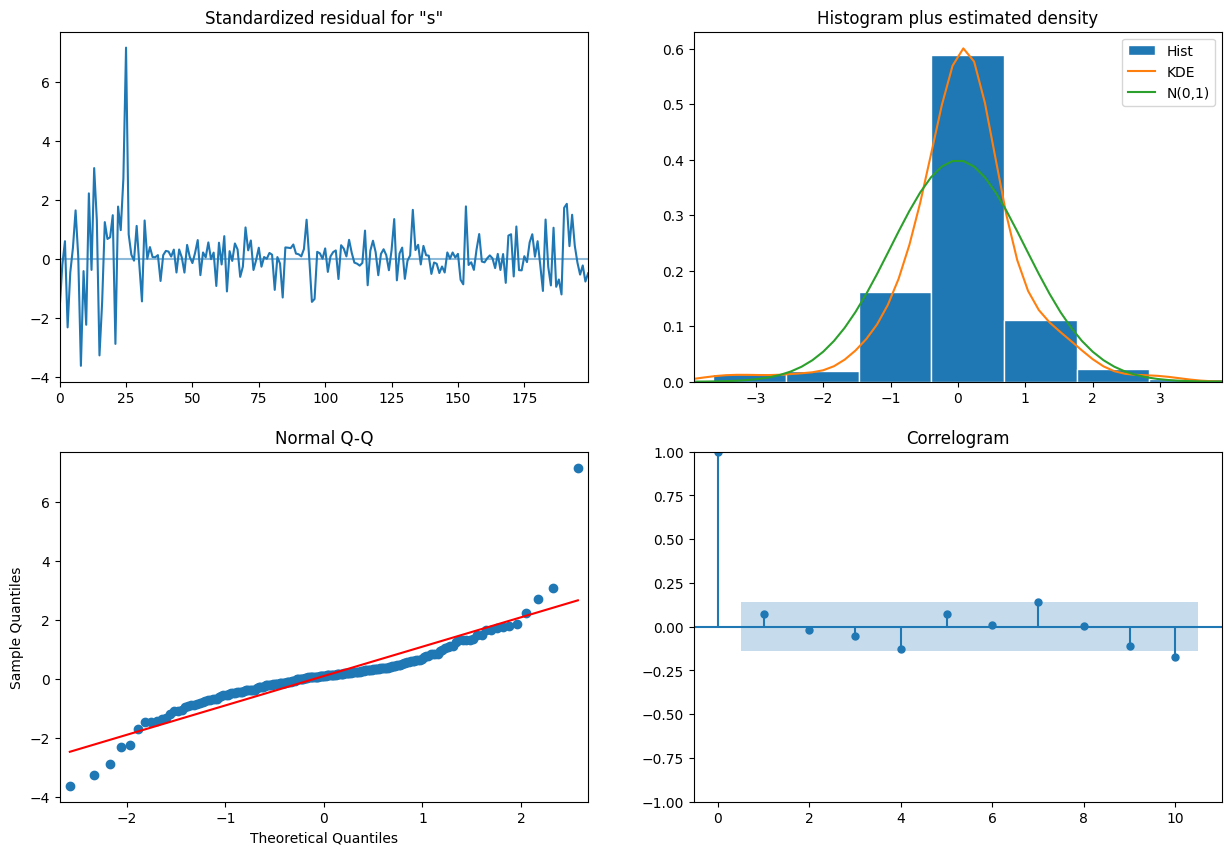

In [33]:
model_fit.plot_diagnostics(figsize=(15, 10))
plt.show()

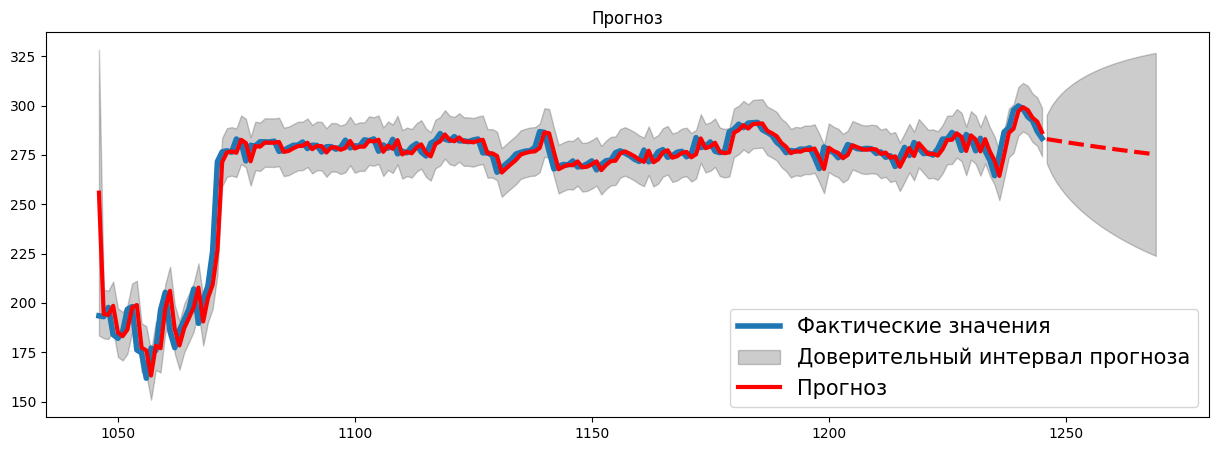

In [34]:
forecast = model_fit.get_prediction()
forecast_ci = forecast.conf_int()

plt.figure(figsize=(15,5))

plt.plot(df['sales'], label="Фактические значения", linewidth=4)
plt.fill_between(forecast_ci.index,
forecast_ci.iloc[:, 0],
forecast_ci.iloc[:, 1], color='k', alpha=.2, label='Доверительный интервал прогноза')
plt.plot(forecast.predicted_mean, color='red', label="Прогноз", linewidth=3)

forecast = model_fit.get_forecast(steps=24)
plt.plot(forecast.predicted_mean, color='red', linestyle='dashed', linewidth=3)
forecast_ci = forecast.conf_int()
plt.fill_between(forecast_ci.index,
forecast_ci.iloc[:, 0],
forecast_ci.iloc[:, 1], color='k', alpha=.2)

plt.legend(fontsize=15)

plt.title('Прогноз')

plt.show()

In [35]:
forecast = model_fit.predict()

mse = mean_squared_error(df['sales'], forecast)

print(f'MSE: {mse}')

MSE: 58.26648861109477


In [36]:
model = ARIMA(df['sales'], order=(2, 0, 0))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  200
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -651.919
Date:                Wed, 11 Dec 2024   AIC                           1311.838
Time:                        15:23:05   BIC                           1325.031
Sample:                             0   HQIC                          1317.177
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        257.5331     23.264     11.070      0.000     211.937     303.130
ar.L1          1.0776      0.055     19.648      0.000       0.970       1.185
ar.L2         -0.0944      0.052     -1.800      0.0

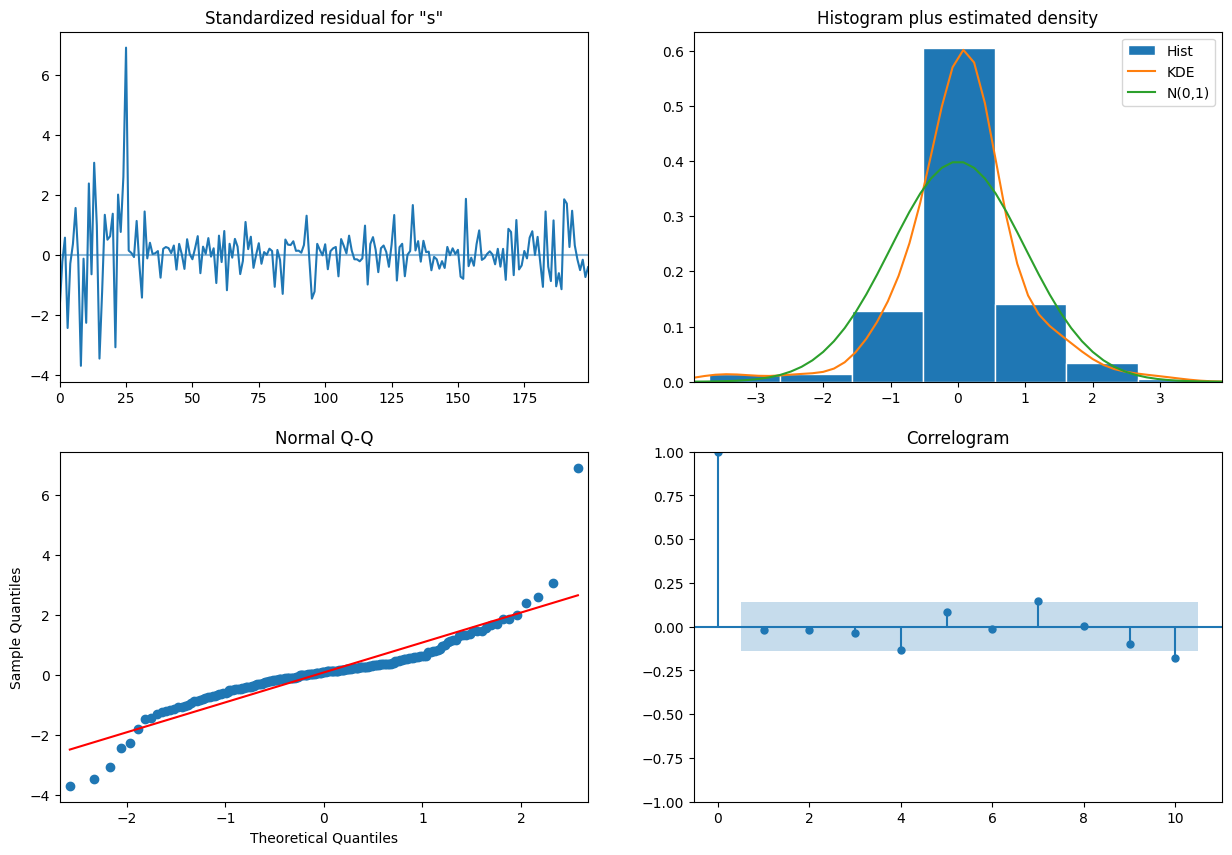

In [37]:
model_fit.plot_diagnostics(figsize=(15, 10))
plt.show()

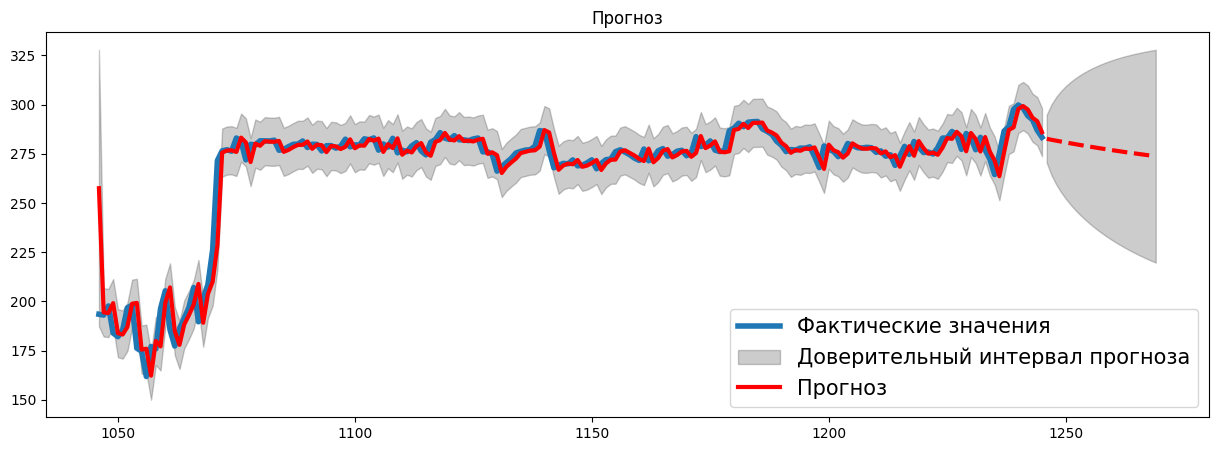

In [38]:
forecast = model_fit.get_prediction()
forecast_ci = forecast.conf_int()

plt.figure(figsize=(15,5))

plt.plot(df['sales'], label="Фактические значения", linewidth=4)
plt.fill_between(forecast_ci.index,
forecast_ci.iloc[:, 0],
forecast_ci.iloc[:, 1], color='k', alpha=.2, label='Доверительный интервал прогноза')
plt.plot(forecast.predicted_mean, color='red', label="Прогноз", linewidth=3)

forecast = model_fit.get_forecast(steps=24)
plt.plot(forecast.predicted_mean, color='red', linestyle='dashed', linewidth=3)
forecast_ci = forecast.conf_int()
plt.fill_between(forecast_ci.index,
forecast_ci.iloc[:, 0],
forecast_ci.iloc[:, 1], color='k', alpha=.2)

plt.legend(fontsize=15)

plt.title('Прогноз')

plt.show()

In [39]:
forecast = model_fit.predict()

mse = mean_squared_error(df['sales'], forecast)

print(f'MSE: {mse}')

MSE: 58.92582620252185
